# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [10]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

In [11]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [12]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [20]:
# Create a Beautiful Soup Object
html = browser.html
soup = BeautifulSoup(html, 'html.parser')

In [21]:
# Extract all rows of data
e_rows = soup.find_all('tr')

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [23]:
# Create an empty list
# Initialize an empty list to store the dictionaries
data = []

# Loop through the rows in the table
for row in e_rows:
    # Find all columns (td) in the row
    cols = row.find_all('td')
    
    # Strip the text and store it in a list
    cols = [col.text.strip() for col in cols]
    
    # Only process rows that have exactly 7 columns
    if len(cols) == 7:
        # Append the row data as a dictionary to the list
        data.append({
            'id': cols[0],
            'terrestrial_date': cols[1],
            'sol': cols[2],
            'ls': cols[3],
            'month': cols[4],
            'min_temp': cols[5],
            'pressure': cols[6]
        })


In [28]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
df = pd.DataFrame(data)

In [30]:
# Confirm DataFrame was created successfully
df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [33]:
# Examine data type of each column
print(df.dtypes)

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object


In [34]:
# Change data types for data analysis
df['id'] = pd.to_numeric(df['id'], errors='coerce', downcast='integer')
df['terrestrial_date'] = pd.to_datetime(df['terrestrial_date'], errors='coerce')
df['sol'] = pd.to_numeric(df['sol'], errors='coerce', downcast='integer')
df['ls'] = pd.to_numeric(df['ls'], errors='coerce', downcast='integer')
df['month'] = pd.to_numeric(df['month'], errors='coerce', downcast='integer')
df['min_temp'] = pd.to_numeric(df['min_temp'], errors='coerce', downcast='float')
df['pressure'] = pd.to_numeric(df['pressure'], errors='coerce', downcast='float')

In [35]:
# Confirm type changes were successful by examining data types again
print(df.dtypes)

id                           int16
terrestrial_date    datetime64[ns]
sol                          int16
ls                           int16
month                         int8
min_temp                   float32
pressure                   float32
dtype: object


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [36]:
# 1. How many months are there on Mars?
unique_months = df['month'].nunique()
unique_months

12

In [37]:
# 2. How many sols (Martian days) worth of data are there?
unique_sols = df['sol'].nunique()
unique_sols

1867

In [38]:
# 3. What is the average minimum temperature by month?
df['min_temp'] = pd.to_numeric(df['min_temp'], errors='coerce')
average_temp_by_month = df.groupby('month')['min_temp'].mean()
average_temp_by_month

month
1    -77.160919
2    -79.932587
3    -83.307289
4    -82.747421
5    -79.308723
6    -75.299316
7    -72.281693
8    -68.382980
9    -69.171638
10   -71.982140
11   -71.985504
12   -74.451805
Name: min_temp, dtype: float32

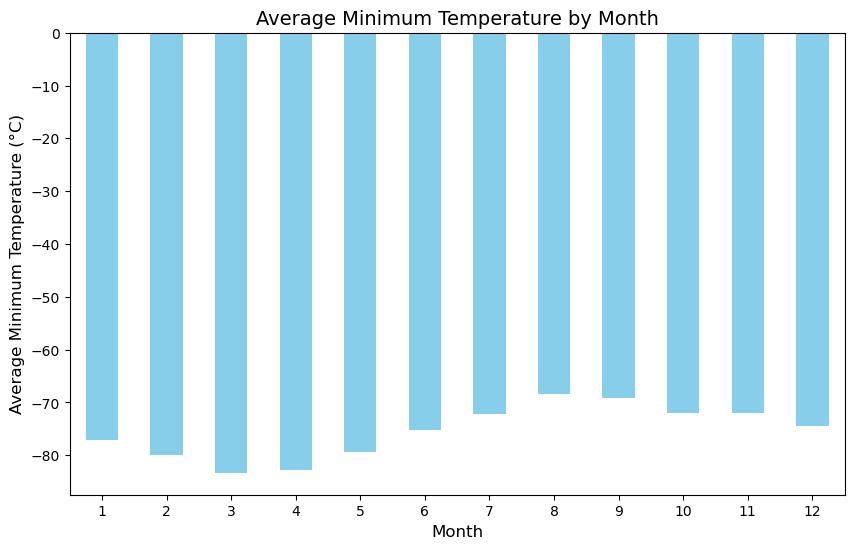

In [49]:
# Plot the average minimum temperature by month
plt.figure(figsize=(10,6))  
average_temp_by_month.plot(kind='bar', color='skyblue')  

# Adding title and axis labels
plt.title('Average Minimum Temperature by Month', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Average Minimum Temperature (°C)', fontsize=12)

# Rotate the x-axis labels (optional)
plt.xticks(rotation=0)  # Keeps the x-axis labels horizontal

# Display the plot
plt.show()

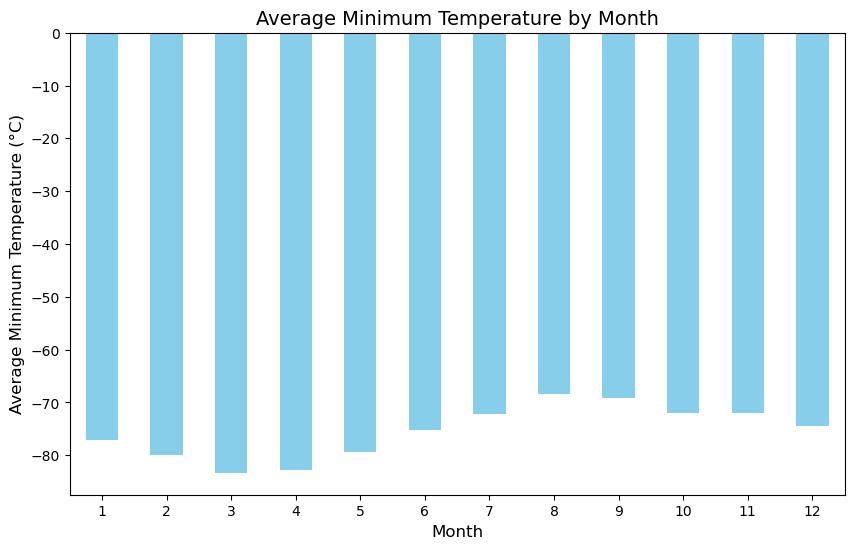

In [48]:
# Identify the coldest and hottest months in Curiosity's location by sorting the previous graph

sorted_temp_by_month = average_temp_by_month.sort_values()  

# Identify the coldest and hottest months
coldest_month = sorted_temp_by_month.index[0]  # Month with the lowest temperature
hottest_month = sorted_temp_by_month.index[-1]  # Month with the highest temperature

# Plotting the average minimum temperature again
plt.figure(figsize=(10,6))
average_temp_by_month.plot(kind='bar', color='skyblue')

# Adding title and axis labels
plt.title('Average Minimum Temperature by Month', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Average Minimum Temperature (°C)', fontsize=12)

# Rotate the x-axis labels (optional)
plt.xticks(rotation=0)  # Keeps the x-axis labels horizontal

# Display the plot
plt.show()


In [43]:
# 4. What is the average pressure by month?
average_pressure_by_month = df.groupby('month')['pressure'].mean()
average_pressure_by_month 

month
1     862.488525
2     889.455078
3     877.322937
4     806.329895
5     748.557068
6     745.054443
7     795.105652
8     873.829773
9     913.305969
10    887.312500
11    857.014465
12    842.156616
Name: pressure, dtype: float32

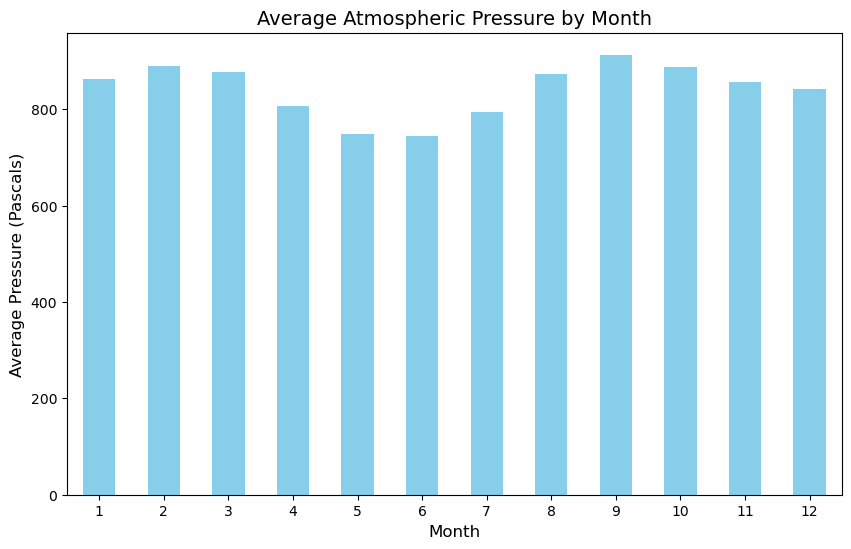

In [47]:
# Plot the average pressure by month
plt.figure(figsize=(10,6))
average_pressure_by_month.plot(kind='bar', color='skyblue')
plt.title('Average Atmospheric Pressure by Month', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Average Pressure (Pascals)', fontsize=12)
plt.xticks(rotation=0)  # Keeps the x-axis labels horizontal
plt.show()

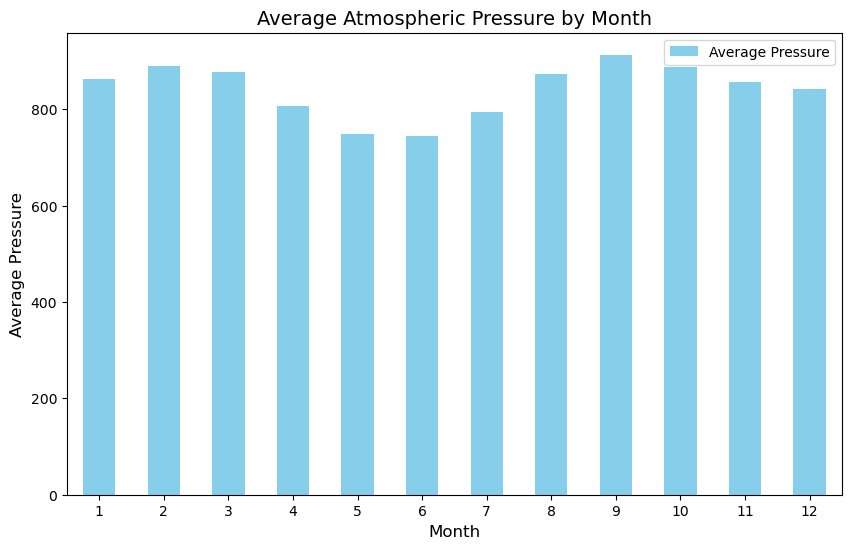

In [54]:
# Identify the lowest and highest pressure months in Curiosity's location by sorting the previous graph
# Sort the average pressure by month
sorted_pressure = average_pressure_by_month.sort_values()

# Get the lowest and highest pressure months
lowest_pressure_month = sorted_pressure.idxmin()
lowest_pressure_value = sorted_pressure.min()

highest_pressure_month = sorted_pressure.idxmax()
highest_pressure_value = sorted_pressure.max()

# Plot all months average pressure
plt.figure(figsize=(10,6))
average_pressure_by_month.plot(kind='bar', color='skyblue', label='Average Pressure')

# Customize the plot
plt.title('Average Atmospheric Pressure by Month', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Average Pressure', fontsize=12)
plt.xticks(rotation=0)  # Keeps the x-axis labels horizontal
plt.legend()

# Show the plot
plt.show()

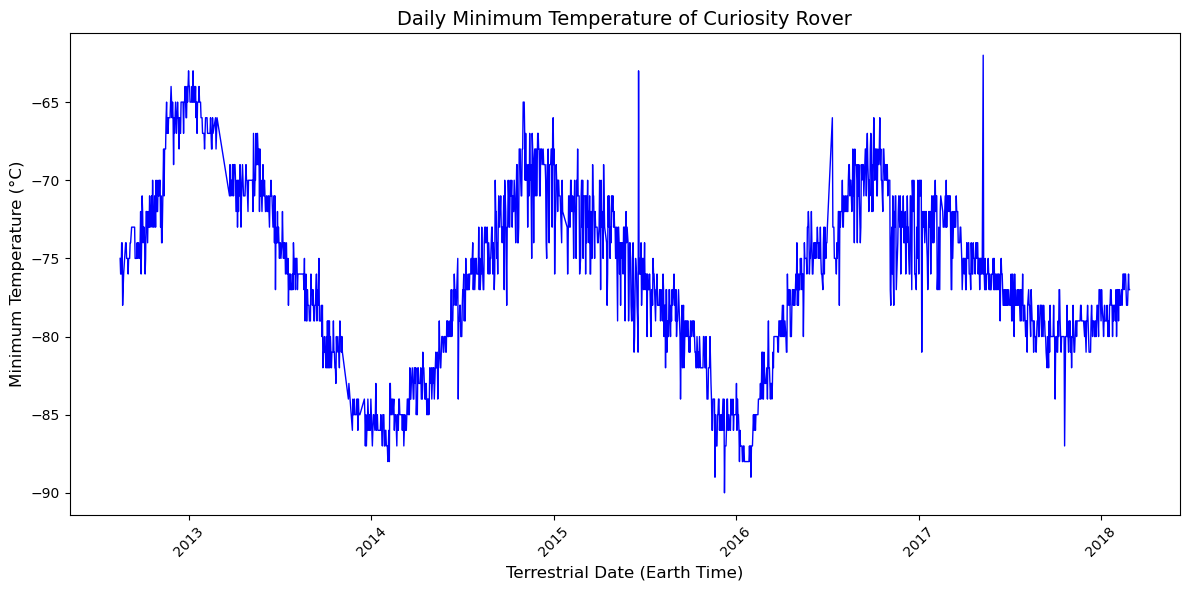

In [58]:
# 5. How many terrestrial (Earth) days are there in a Martian year?
# Visually estimate the result by plotting the daily minimum temperature of each observation in the data set.
plt.figure(figsize=(12, 6))
plt.plot(df['terrestrial_date'], df['min_temp'], color='b', linewidth=1)  # Simplified plot with no markers

# Customizing the plot for simplicity
plt.title('Daily Minimum Temperature of Curiosity Rover', fontsize=14)
plt.xlabel('Terrestrial Date (Earth Time)', fontsize=12)
plt.ylabel('Minimum Temperature (°C)', fontsize=12)
plt.xticks(rotation=45)  # Rotate dates for better visibility

# Show the plot
plt.tight_layout()
plt.show()

#### Minimum Temperature

The chart shows that the average minimum temperature doesn’t change much throughout the year, staying between -70°C and -60°C. This could be from a region with a very stable and cold climate, like the poles. The code calculates the average pressure for each month, which does show some variation (e.g., 862.49 in January and 889.46 in February). While the temperature stays steady, it might be interesting to explore if the changes in pressure have any connection to the climate patterns.

#### Atmospheric Pressure

The chart shows how average atmospheric pressure changes over the year. While the pressure stays mostly between 600 and 900 units, there are noticeable dips around months 4 to 6 and peaks in months 1, 2, and 9 through 12. These changes could reflect seasonal patterns, possibly tied to temperature or environmental cycles. The overall range suggests a stable system with moderate variations throughout the year.

#### Year Length

The two graphs show repeating patterns of temperature and atmospheric pressure over 12 months, which suggests they represent one full year. If this data is for Mars, a Martian year is about 687 Earth days long, meaning each “month” would last roughly 57 Earth days. The consistent patterns in both graphs align with the seasonal changes you’d expect over the course of a year.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [59]:
# Write the data to a CSV
df.to_csv('mars_temperature_data.csv', index=False)

In [22]:
browser.quit()